<a href="https://colab.research.google.com/github/lalin15rv-bit/Inteligencia-Artificial/blob/main/Multicapa/Iris_petalo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris            #importamos la libreria que necesitaremos
iris = load_iris()

In [ ]:
print(iris.keys())            #nos ayuda a conocer las llaves para utilizar la libreria

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print(iris.DESCR)             # imprimimos la descripcion e informacion del dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
iris.target_names
iris.target
iris.data                       #Conocemos los valores de las llaves
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
import pandas as pd      #importamos la biblioteca pandas

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
display(iris_df.head())           #Creamos un DataFrame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = iris_df
y = pd.get_dummies(iris.target).values              #definimos los parametros

In [ ]:
from sklearn.model_selection import train_test_split        #importamos la funcion

X_train, X_test, y_train, y_test = train_test_split(
    X, y,                             #toma los datos de entrada "X" y la "Y" que son las etiquetas
    test_size=0.2, random_state=42
)

In [ ]:
print(X_train.shape)              #imprimen las filas y columnas de  nuestros conjuntos
print(X_test.shape)

(120, 4)
(30, 4)


In [ ]:
from sklearn.preprocessing import StandardScaler
                                                              #importamos la clase y coloca nuestros datos para que cada promedio tenga 0 o una desviación estandar de 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)     #Hace 2 cosas calcula la desviacion y aplica esta transformacion
X_test = scaler.transform(X_test)             #evita la perdida de datos

In [ ]:
from tensorflow.keras.models import Sequential        #ayuda a apilar una detras de otra
from tensorflow.keras.layers import Dense     #define una capa conectada

modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),        #contiene 64 neuronas y es la entrada
    Dense(32, activation='relu'),         #contiene 32 neuronas es la capa oculta
    Dense(3, activation='softmax'),       #tiene 3 neuronas y es nuestra salida
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam          #importamos el optimizador aadam

# Tasa de aprendizaje deseada
learning_rate = 0.001       #Se establece la tasa de aprendizaje
adam_optimizer = Adam(learning_rate=learning_rate)

In [ ]:
modelo.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',          #es la uncion de perdida
    metrics=['accuracy']                  #Es la prediccion que hace el modelo
)

In [ ]:
history = modelo.fit(           #inicia el entrenamiento
    X_train, y_train,         #datos de entrada
    epochs=10, batch_size=1,
    validation_data=(X_test, y_test)          #evalua el rendimiento
)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7439 - loss: 0.8987 - val_accuracy: 0.8333 - val_loss: 0.4915
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8373 - loss: 0.4662 - val_accuracy: 0.9000 - val_loss: 0.2709
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8952 - loss: 0.2783 - val_accuracy: 0.9667 - val_loss: 0.1783
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8729 - loss: 0.2522 - val_accuracy: 1.0000 - val_loss: 0.1231
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9238 - loss: 0.1936 - val_accuracy: 1.0000 - val_loss: 0.0853
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9564 - loss: 0.1366 - val_accuracy: 1.0000 - val_loss: 0.0816
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9624 - loss: 0.0993 - val_accuracy: 1.0000 - val_loss: 0.0634
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9653 - loss: 0.0904 - val_accuracy: 1.

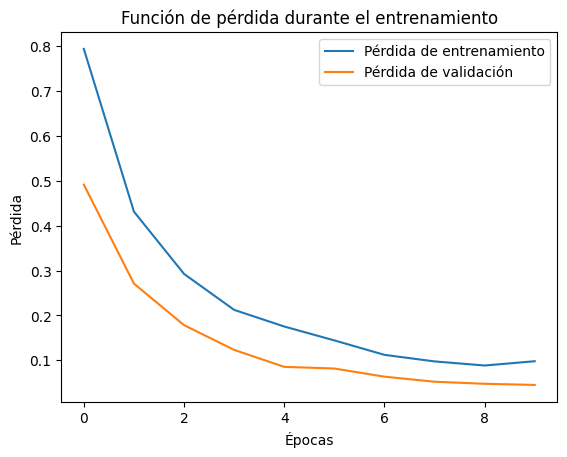

In [ ]:
import matplotlib.pyplot as plt             #nos ayuda esta biblioteca a graficar

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')          #nombre del eje x
plt.ylabel('Pérdida')         #nombre del eje y
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')            #nombre de la tabla
plt.show()          #la mostramos

In [ ]:
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')                  #esta funcion calcula la perdida y la precision

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 1.0000 - loss: 0.0451
Loss: 0.04505234584212303, Accuracy: 1.0


In [ ]:
predictions = modelo.predict(X_test)
# Obtener el índice de la clase predicha para cada punto de datos
predicted_classes = np.argmax(predictions, axis=1)
# Obtenemos el índice de la clase real de y_test
actual_classes = np.argmax(y_test, axis=1)

comparison = pd.DataFrame({'Actual Class Index': actual_classes, 'Predicted Class Index': predicted_classes})
# Agregar columnas con los nombres reales y predichos de las flores utilizando iris.target_names
comparison['Actual Flower'] = [iris.target_names[i] for i in actual_classes]
comparison['Predicted Flower'] = [iris.target_names[i] for i in predicted_classes]
# Reordenar las columnas para una mejor visualización
comparison = comparison[['Actual Class Index', 'Actual Flower', 'Predicted Class Index', 'Predicted Flower']]
print(comparison.head())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
   Actual Class Index Actual Flower  Predicted Class Index Predicted Flower
0                   1    versicolor                      1       versicolor
1                   0        setosa                      0           setosa
2                   2     virginica                      2        virginica
3                   1    versicolor                      1       versicolor
4                   1    versicolor                      1       versicolor


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

y_pred = modelo.predict(X_test)
# Convertir las predicciones a clases
y_pred_classes = np.argmax(y_pred, axis=1) #Se asegura de que tanto las predicciones del modelo como las etiquetas reales
y_test_classes = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes) #Muestra el número de predicciones correctas e incorrectas
# Calcular la sensibilidad
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 1.0


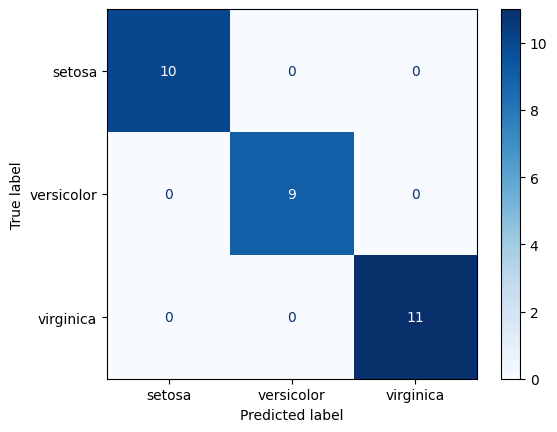

In [ ]:
# Visualizar la matriz de confusión como una imagen de colores
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues') #Colocamos de que color queremos nuestra representación

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(3):
    print(f'Class {i}: {sensitivity[i]}')